#### <i> Secure Energy Transactions Using Blockchain Leveraging AI for Fraud Detection and Energy Market Stability 25311 </i>
#### <i> Import Library Files </i>

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


#### <i> Load the dataset </i>

In [23]:
df = pd.read_csv("Electricity_Spot_Trade_Settlement.csv")
df

,transaction_id,timestamp,user_id,user_role,transaction_type,electricity_quantity,price_per_mwh,total_cost,latency_ms,security_level,encryption_method,zt_authentication,network_slice_id,transaction_status
0,TXN2824,2025-02-14 10:01:42,U5506,Dealer,Buy,22.56,31.02,699.81,28,Low,AES,0,Slice_C,Pending
1,TXN1520,2025-02-14 10:02:02,U2535,Dealer,Buy,55.48,30.27,1679.38,11,Low,RSA,0,Slice_A,Pending
2,TXN5557,2025-02-14 10:55:15,U1106,Dealer,Sell,40.62,31.55,1281.56,29,Medium,AES,1,Slice_A,Pending
3,TXN2584,2025-02-14 10:24:30,U6635,Authority,NaN,0.00,0.00,0.00,13,High,TDKE,1,Slice_C,Pending
4,TXN9785,2025-02-14 10:08:31,U7201,Dealer,Sell,84.65,36.19,3063.48,16,Low,AES,0,Slice_C,Success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TXN1854,2025-02-14 10:00:28,U2585,Dealer,Buy,56.13,37.53,2106.56,29,High,TDKE,1,Slice_C,Pending
9996,TXN3298,2025-02-14 10:58:28,U4643,Supplier,Sell,45.38,34.99,1587.85,25,Low,RSA,0,Slice_A,Pending
9997,TXN1705,2025-02-14 10:36:19,U3565,Supplier,Buy,82.85,33.18,2748.96,9,High,TDKE,1,Slice_C,Success
9998,TXN2306,2025-02-14 10:40:23,U7824,Authority,NaN,0.00,0.00,0.00,21,Low,AES,0,Slice_C,Pending


#### <i> Dataset Overview </i>

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   transaction_id        10000 non-null  object 
 1   timestamp             10000 non-null  object 
 2   user_id               10000 non-null  object 
 3   user_role             10000 non-null  object 
 4   transaction_type      6700 non-null   object 
 5   electricity_quantity  10000 non-null  float64
 6   price_per_mwh         10000 non-null  float64
 7   total_cost            10000 non-null  float64
 8   latency_ms            10000 non-null  int64  
 9   security_level        10000 non-null  object 
 10  encryption_method     10000 non-null  object 
 11  zt_authentication     10000 non-null  int64  
 12  network_slice_id      10000 non-null  object 
 13  transaction_status    10000 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1.1+ MB


In [25]:
df.describe()

,electricity_quantity,price_per_mwh,total_cost,latency_ms,zt_authentication
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,36.856521,23.437855,1289.417726,17.714500,0.660500
std,33.527813,16.617224,1181.662953,7.481857,0.473563
min,0.000000,0.000000,0.000000,5.000000,0.000000
25%,0.000000,0.000000,0.000000,11.000000,0.000000
50%,32.915000,32.550000,1139.485000,18.000000,1.000000
75%,66.555000,36.190000,2298.360000,24.000000,1.000000
max,100.000000,40.000000,3955.120000,30.000000,1.000000


In [26]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['weekday'] = df['timestamp'].dt.day_name()
df['month'] = df['timestamp'].dt.month_name()
df['cost_per_unit'] = df['total_cost'] / df['electricity_quantity']
df['is_high_latency'] = df['latency_ms'] > df['latency_ms'].quantile(0.9)
df['is_anomaly_price'] = df['cost_per_unit'] > df['cost_per_unit'].quantile(0.95)
df['transaction_type'].fillna('Unknown', inplace=True)

#### <i> Data Visulization And Analysis </i>

In [27]:
#  Transaction Volume Over Time
# -------------------------
tx_hourly = df.groupby(df['timestamp'].dt.floor('H'))['transaction_id'].count().reset_index()
fig = px.line(tx_hourly, x='timestamp', y='transaction_id', title='📈 Transaction Volume Per Hour')
fig.update_layout(xaxis_title='Time', yaxis_title='Number of Transactions')
fig.show()

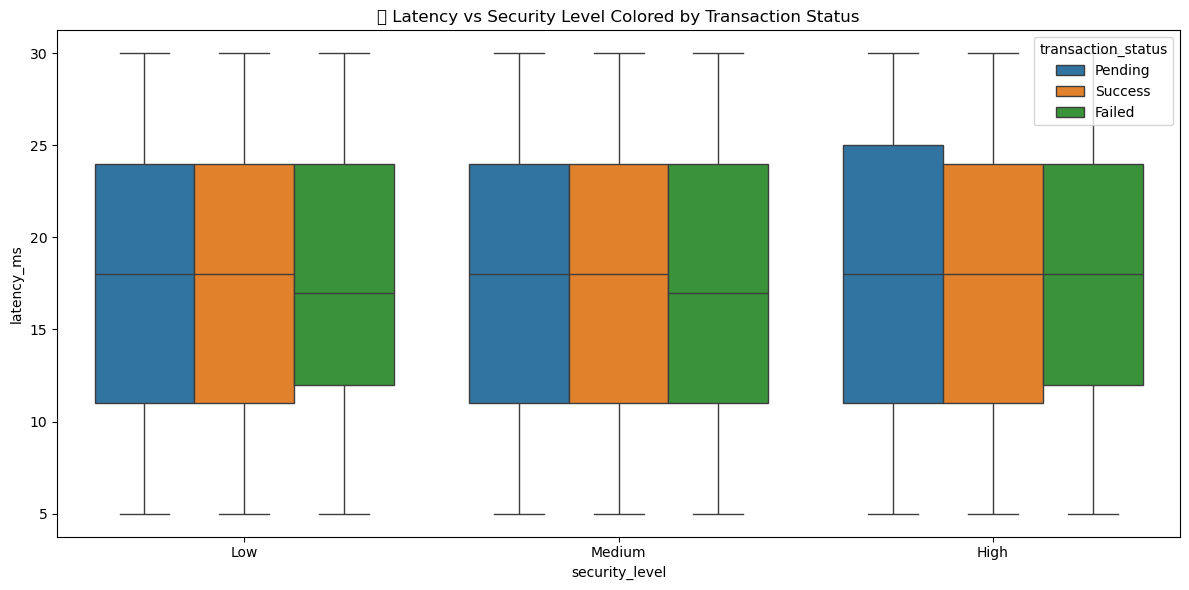

In [28]:
#  Security Level vs. Latency with Transaction Status
# -------------------------
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='security_level', y='latency_ms', hue='transaction_status')
plt.title('🔐 Latency vs Security Level Colored by Transaction Status')
plt.tight_layout()
plt.show()

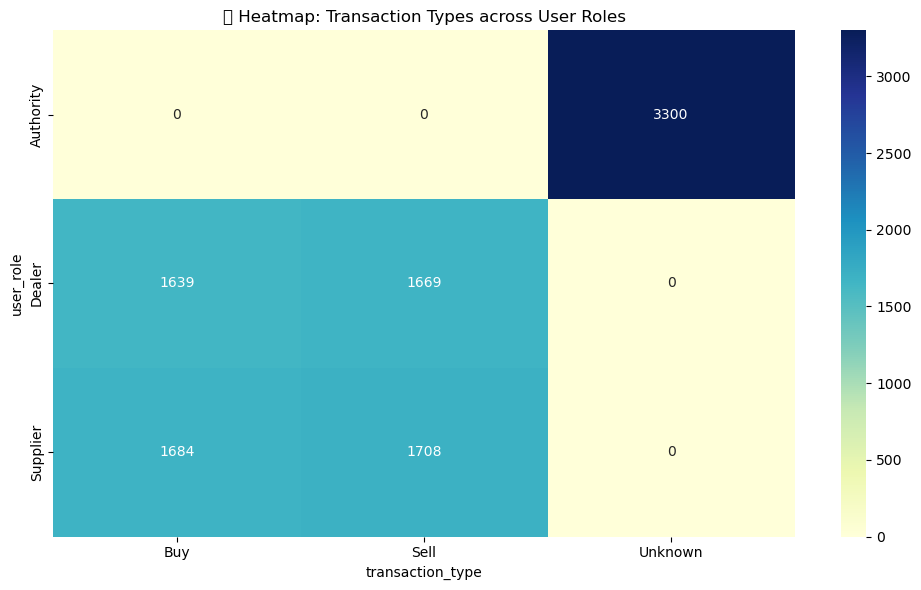

In [29]:
#  Heatmap: Transaction Type vs. User Role
# -------------------------
pivot = pd.pivot_table(df, values='transaction_id', index='user_role', columns='transaction_type', aggfunc='count').fillna(0)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt=".0f")
plt.title('🔥 Heatmap: Transaction Types across User Roles')
plt.tight_layout()
plt.show()

In [30]:
#  Anomalous High Cost per Unit (Interactive)
# -------------------------
fig = px.scatter(df[df['is_anomaly_price']], x='timestamp', y='cost_per_unit',
                 color='user_role', size='latency_ms',
                 hover_data=['transaction_type', 'security_level'],
                 title='🚨 High Cost per MWh (Anomalies)')
fig.show()

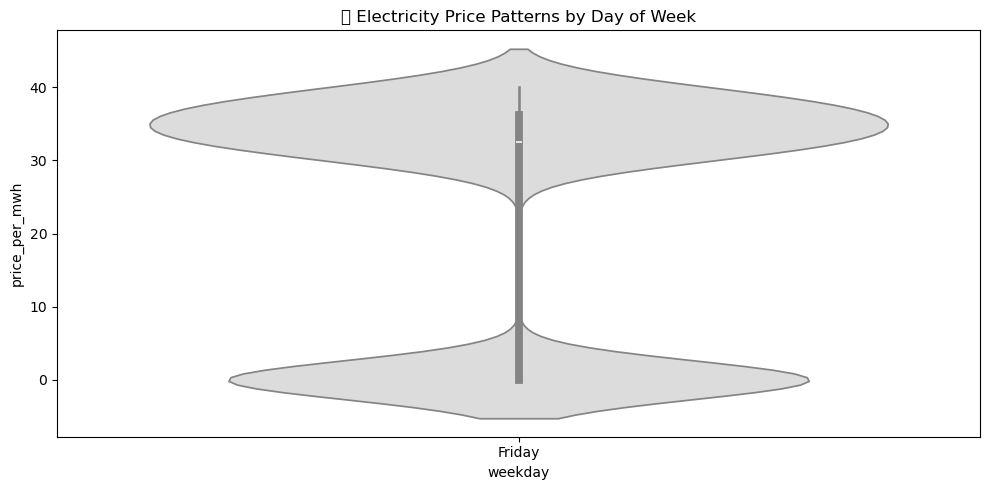

In [31]:
#  Daily Market Behavior Patterns
# -------------------------
plt.figure(figsize=(10, 5))
sns.violinplot(x='weekday', y='price_per_mwh', data=df, palette='coolwarm')
plt.title('📊 Electricity Price Patterns by Day of Week')
plt.tight_layout()
plt.show()

In [32]:
#  Interactive Heatmap of Hourly Transactions by User Role
# -------------------------
hourly_role = pd.pivot_table(df, index='hour', columns='user_role', values='transaction_id', aggfunc='count').fillna(0)
fig = px.imshow(hourly_role, text_auto=True, color_continuous_scale='Oranges', title='⏰ Transactions by Hour & User Role')
fig.update_layout(xaxis_title="User Role", yaxis_title="Hour")
fig.show()

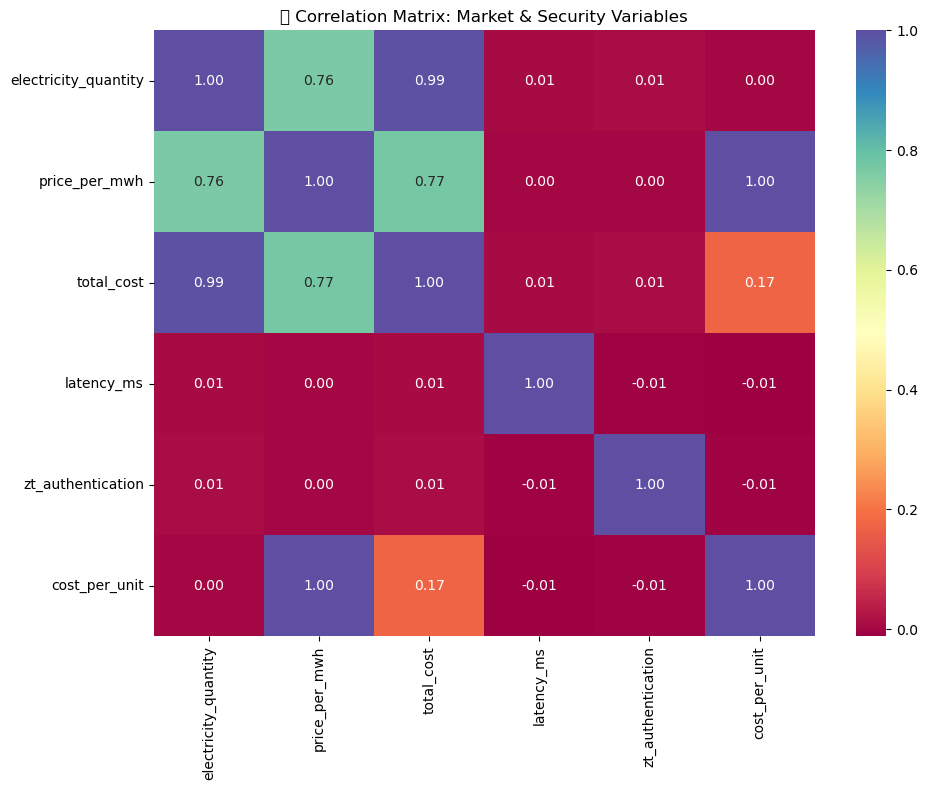

In [33]:
#  Correlation Matrix (Cost, Quantity, Security)
# -------------------------
plt.figure(figsize=(10, 8))
corr = df[['electricity_quantity', 'price_per_mwh', 'total_cost', 'latency_ms', 'zt_authentication', 'cost_per_unit']].corr()
sns.heatmap(corr, annot=True, cmap='Spectral', fmt=".2f")
plt.title('🔗 Correlation Matrix: Market & Security Variables')
plt.tight_layout()
plt.show()

In [34]:
#  Transaction Status Breakdown Across Network Slices
# -------------------------
status_slices = df.groupby(['network_slice_id', 'transaction_status']).size().reset_index(name='count')
fig = px.bar(status_slices, x='network_slice_id', y='count', color='transaction_status',
             title='📡 Transaction Status by Network Slice')
fig.show()


In [35]:
#  Multivariate Distribution: Cost, Latency & Security
# -------------------------
fig = px.scatter_3d(df, x='cost_per_unit', y='latency_ms', z='zt_authentication',
                    color='transaction_status', symbol='security_level',
                    title='🧠 3D Insight: Cost vs Latency vs Auth Status')
fig.show()

In [36]:
#  Animated Bar Race: Monthly Transactions by User Role
# -------------------------
df['month_short'] = df['timestamp'].dt.strftime('%b')
monthly = df.groupby(['month_short', 'user_role']).size().reset_index(name='count')

fig = px.bar(monthly, x='user_role', y='count', color='user_role',
             animation_frame='month_short', title='🏃‍♂️ Monthly Transactions Race by User Role')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

In [37]:
#  Bubble Chart: Price vs Quantity with Security Level
# -------------------------
fig = px.scatter(df, x='electricity_quantity', y='price_per_mwh', size='total_cost',
                 color='security_level', hover_name='transaction_status',
                 title="🫧 Bubble Chart: Price vs Quantity (Sized by Cost)")
fig.update_layout(xaxis_title="Electricity Quantity (MWh)", yaxis_title="Price per MWh")
fig.show()


#### <i> Data Preprocessing </i>

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# -----------------------
# Feature Engineering
# -----------------------
# 1. Extract date-time features
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month

# 2. Handle missing values in transaction_type
df['transaction_type'] = df['transaction_type'].fillna('Unknown')

# 3. Create new cost-related feature
df['cost_per_unit'] = df['total_cost'] / df['electricity_quantity']
df['cost_per_unit'] = df['cost_per_unit'].replace([np.inf, -np.inf], np.nan).fillna(0)

# -----------------------
# Define target for classification
# -----------------------
# Example: Predicting transaction_status (Success vs Failed)
target_col = 'transaction_status'
X = df.drop(columns=[target_col, 'transaction_id', 'timestamp', 'user_id'])
y = df[target_col]

# -----------------------
# Encoding target variable
# -----------------------
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # For binary or multiclass classification

# -----------------------
# Identify feature types
# -----------------------
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# -----------------------
# Preprocessing Pipelines
# -----------------------
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)
])

# -----------------------
# Train-test split
# -----------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.25, stratify=y_encoded, random_state=42)

# -----------------------
# Final pipeline (Preprocessing only)
# -----------------------
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor)
])

# Fit-transform the training data, transform the test data
X_train_preprocessed = pipeline.fit_transform(X_train)
X_test_preprocessed = pipeline.transform(X_test)

# -----------------------
# Final Shapes
# -----------------------
print(f"X_train shape: {X_train_preprocessed.shape}")
print(f"X_test shape: {X_test_preprocessed.shape}")
print(f"y_train distribution: {np.bincount(y_train)}")




X_train shape: (7500, 26)
X_test shape: (2500, 26)
y_train distribution: [2528 2474 2498]


#### <i> Modeling </i>
#### <i> Random Forest Classifier </i>

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------
# Model Setup: Random Forest Classifier
# -----------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_preprocessed, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test_preprocessed)

# -----------------------
# Model Evaluation
# -----------------------
# Accuracy
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")

# Classification Report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))


Random Forest Accuracy: 0.3368

Random Forest Classification Report:
              precision    recall  f1-score   support

      Failed       0.33      0.35      0.34       843
     Pending       0.34      0.35      0.34       825
     Success       0.34      0.31      0.33       832

    accuracy                           0.34      2500
   macro avg       0.34      0.34      0.34      2500
weighted avg       0.34      0.34      0.34      2500



#### <i> Logistic Regression </i>

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------
# Model Setup: Logistic Regression
# -----------------------
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg_model.fit(X_train_preprocessed, y_train)

# Predict on test set
y_pred_log_reg = log_reg_model.predict(X_test_preprocessed)

# -----------------------
# Model Evaluation
# -----------------------
# Accuracy
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")


# Classification Report
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg, target_names=label_encoder.classes_))


Logistic Regression Accuracy: 0.3224

Logistic Regression Classification Report:
              precision    recall  f1-score   support

      Failed       0.32      0.39      0.35       843
     Pending       0.32      0.28      0.30       825
     Success       0.33      0.30      0.31       832

    accuracy                           0.32      2500
   macro avg       0.32      0.32      0.32      2500
weighted avg       0.32      0.32      0.32      2500



#### <i> XGBoost </i>

In [41]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------
# Model Setup: XGBoost Classifier
# -----------------------
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train_preprocessed, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test_preprocessed)

# -----------------------
# Model Evaluation
# -----------------------
# Accuracy
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb)}")

# Classification Report
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))


XGBoost Accuracy: 0.3588

XGBoost Classification Report:
              precision    recall  f1-score   support

      Failed       0.34      0.34      0.34       843
     Pending       0.36      0.37      0.36       825
     Success       0.37      0.37      0.37       832

    accuracy                           0.36      2500
   macro avg       0.36      0.36      0.36      2500
weighted avg       0.36      0.36      0.36      2500



#### <i> Model Comparison </i>

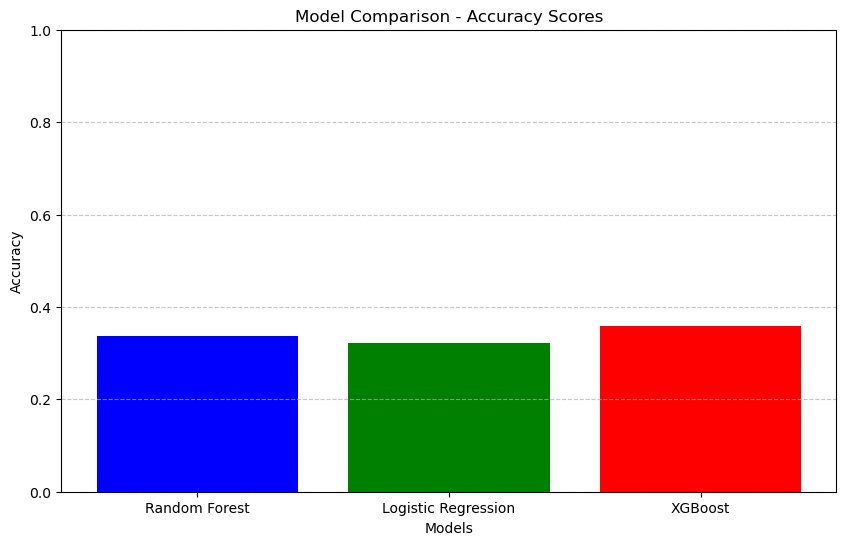

Random Forest Accuracy: 0.3368
Logistic Regression Accuracy: 0.3224
XGBoost Accuracy: 0.3588


In [42]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------
# Model Accuracy Evaluation
# -----------------------

# Accuracy scores for all models
accuracy_scores = {
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'Logistic Regression': accuracy_score(y_test, y_pred_log_reg),
    'XGBoost': accuracy_score(y_test, y_pred_xgb)
}

# -----------------------
# Model Comparison Visualization
# -----------------------
model_names = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

# Plot bar chart for model comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, scores, color=['blue', 'green', 'red'])

# Add labels and title
plt.title('Model Comparison - Accuracy Scores')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Set y-axis to range from 0 to 1 for accuracy
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# -----------------------
# Print Accuracy Scores for each model
# -----------------------
for model_name, score in accuracy_scores.items():
    print(f"{model_name} Accuracy: {score:.4f}")
